# How Classification Comes to Be...

- First, let's import the "credit" dataset by installing the ISLP module and learning how to load directly from our package...
  - [Link to package](https://github.com/intro-stat-learning/ISLP): Always research the packages you install!
  - [Documentation](https://intro-stat-learning.github.io/ISLP/datasets/Default.html) on how to use the ISLP package!

### Data Dictionary:

`default`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer defaulted on their debt

`student`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer is a student

`balance`: The average balance that the customer has remaining on their credit card after making their monthly payment

`income`: Income of customer

In [1]:
# run this code then restart your runtime above!
! pip install ISLP


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e7ef4c639b22bc2999d00c523b05d2a61d4b13469e6322a7394627bae28e1cdb
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstall

#### ALWAYS remember to resart your runtime after you install a package!

In [1]:
from ISLP import load_data
default_data = load_data('Default')
default_data.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [ ]:
default_data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
default_data['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
default_data['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

### What happens if we run a regression on our binary default data?

First let's convert No and Yes to 0 and 1 respectively.

In [ ]:
default_data['student'] = default_data['student'].map({'No': 0,'Yes': 1}).astype(int) # know how to do this!!

default_data['student'].value_counts()

0    7056
1    2944
Name: student, dtype: int64

In [ ]:
default_data['default'] = default_data['default'].map({'No': 0,'Yes': 1}).astype(int) # know how to do this!!

default_data['default'].value_counts()

0    9667
1     333
Name: default, dtype: int64

In [ ]:
default_data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
from numpy.random.mtrand import seed
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = default_data.drop("default", axis=1)
y = default_data[["default"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.15,
                                                    random_state=2489,
                                                    shuffle=True) # shuffle our data!!


# Transforming Train and Test Data

Ensure that any transformations you make on feature training data be done on the features of the test **separately**!

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
# Our results are normal, except we have an oddly low R-Squared
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     387.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          6.31e-236
Time:                        15:16:33   Log-Likelihood:                 3131.8
No. Observations:                8500   AIC:                            -6256.
Df Residuals:                    8496   BIC:                            -6227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0748      0.009     -8.255      0.0

# Predicting Binary Variables With Regression

- Something is wrong with our model... Let's explore it further by predicting a binary variable with our model and then plotting it.

In [ ]:
preds = model.predict(X_test)

In [ ]:
from pandas import concat
true_and_pred_data = concat([y_test.reset_index(drop=True), preds.reset_index(drop=True)], axis=1)
true_and_pred_data.columns = ["True_Default", "Predicted_Default"]

In [ ]:
import altair as alt
from pandas import DataFrame
# Create a DataFrame for the line based on the model's coefficients
line_data = DataFrame({
    'Predicted_Default': X_test.dot(model.params).values,
    'True_Default': X_test.dot(model.params).values
})

points = alt.Chart(true_and_pred_data).mark_point(size=20, opacity=.2).encode(
    x='Predicted_Default',
    y='True_Default'
)

line = alt.Chart(line_data).mark_line(color='red', strokeDash=[5, 5]).encode(
    x='Predicted_Default',
    y='True_Default'
)


text_label = alt.Chart(line_data).mark_text(angle=345, text="Our Predicted Model", dy=80, fontSize=12, color='red')

combined_chart_with_label = points + line + text_label
combined_chart_with_label


alt.LayerChart(...)

# Why is this model bad?

- Look at the last point of our regression line above! We never predict more than 30% of the binary defaults: that's worse than random chance!
- Notice that we even predict into the **negative probabilities* in the chart above! That's not possible...
- Look at the joing plot below, there are way more non-defaults than defaults: that skews our regression.

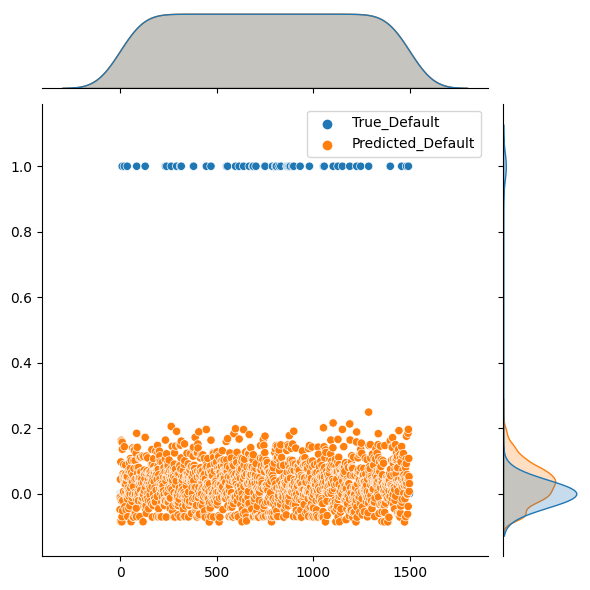

In [ ]:
import seaborn as sns
sns.jointplot(true_and_pred_data)

# Back to the slides where we will learn a different type of "regression".

# Let's build our own logistic regression!

In [ ]:
logistic_x_train = sm.add_constant(X_train)
logit_mod = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079173
         Iterations 10


In [ ]:
print(logit_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8500
Model:                          Logit   Df Residuals:                     8496
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.4533
Time:                        15:16:45   Log-Likelihood:                -672.97
converged:                       True   LL-Null:                       -1231.0
Covariance Type:            nonrobust   LLR p-value:                1.210e-241
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4921      0.522    -20.088      0.000     -11.516      -9.468
student       -0.8099      0.256     -3.170      0.002      -1.311      -0.309
balance        0.0057      0.000     22.662      0.0

In [ ]:
from pandas import DataFrame
from math import exp

# these are the coefficients and their variables
variables = logit_mod.params.index
print(variables)

# exponentiate model log-odds coefficients
exp_coefs = [exp(val) for val in logit_mod.params]

# assign to dataframe
interpretable_coefs = DataFrame(data = exp_coefs,
                                index=variables).T
interpretable_coefs


Index(['const', 'student', 'balance', 'income'], dtype='object')


,const,student,balance,income
0,0.000028,0.444885,1.005677,0.999996


## Interpretation

- The odds of defaulting for students are 55.6% lower than for non-students. (It's made up data, this isn't true).

- The odds suggest that an increase in account balance slightly raises the likelihood of default, while income has a negligible effect on the odds of defaulting, holding all else equal. (It's made up data, this isn't true).






- If the odds ratio is **greater** than 1, it indicates that as the predictor increases, the odds of the outcome occurring also increase.

- If the odds ratio is **less** than 1, it indicates that as the predictor increases, the odds of the outcome occurring decrease.

- If the odds ratio is **equal** to 1, it suggests no association between the predictor and the outcome.

# True Plots

## Load Data

In [ ]:
# load data
from pandas import read_csv

file_path = "/content/drive/MyDrive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/Data/mtcars.csv"

cars = read_csv(file_path)

cars.head()

FileNotFoundError: ignored

# Predict Linear Regression on Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the data
X = cars.drop(['mpg', 'model'], axis=1)
y = cars['mpg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=443)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions for both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# True Plot Creation

In [ ]:
import altair as alt
from pandas import DataFrame, concat

# Convert the predictions and true values into a dataframe for visualization with Altair
train_data = DataFrame({
    'True Values': y_train,
    'Predicted Values': y_train_pred,
    'Dataset': 'Training'
})

test_data = DataFrame({
    'True Values': y_test,
    'Predicted Values': y_test_pred,
    'Dataset': 'Test'
})

all_data = concat([train_data, test_data])

# Define the perfect prediction line
perfect_line_calc = [min(y) - 1, max(y) + 1]

perfect_prediction = DataFrame({
    'True Values': perfect_line_calc,
    'Predicted Values': perfect_line_calc
})

# Create the Altair plots

# Training data plot
train_chart = alt.Chart(train_data).mark_circle(color='blue').encode(
    x='True Values',
    y='Predicted Values',
    tooltip=['True Values', 'Predicted Values']
).properties(
     width=300,
    height=0,
    title='Predicted Versus True Values (Training Data)'
)

# Test data plot
test_chart = alt.Chart(test_data).mark_circle(color='red').encode(
    x='True Values',
    y='Predicted Values',
    tooltip=['True Values', 'Predicted Values']
).properties(
    width=300,
    height=300,
    title='Predicted Versus True Values (Test Data)'
)

# Perfect prediction line
line_chart = (alt.Chart(perfect_prediction)
                 .mark_line(color='black', strokeDash=[5,5])
                 .encode(
                        x='True Values',
                        y='Predicted Values'
                    )
        )
# Alternative Facet Chart by creating multiple charts
(train_chart + line_chart) | (test_chart + line_chart)


alt.HConcatChart(...)

## Mean Absolute Error (MAE)

 $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
   $$

MAE represents the average of the absolute differences between the predicted and actual values.

In [ ]:
from typing import List
from numpy import mean
def MAE(true_values: List[float], predicted_values: List[float]) -> float:
  """Calculates the mean absolute error of our prediction. Affected by outliers!"""

  return abs(mean(true_values - predicted_values))

mae_results = MAE(y_test, y_test_pred)
print(f"The MAE of our test predictions is: {mae_results}")

The MAE of our test predictions is: 0.051833015254859206


## Median Absolute Error (MedAE)

  $$
   \text{MedAE} = \text{median}(|y_1 - \hat{y}_1|, |y_2 - \hat{y}_2|, \dots, |y_n - \hat{y}_n|)
   $$


MedAE represents the median of the absolute differences between the predicted and actual values.

In [ ]:
from numpy import median
def MedAE(true_values: List[float], predicted_values: List[float]) -> float:
  """Calculates the median absolute error of our prediction. Less affected by outliers!"""

  return median(abs(true_values - predicted_values))

med_ae_results = MedAE(y_test, y_test_pred)
print(f"The MedAE of our test predictions is: {med_ae_results}")

The MedAE of our test predictions is: 2.057013300407089


# Log-Log Regression Model Coefficients

$$
\log(\text{mpg}_i) = \beta_0 + \beta_1 \log(\text{wt}_i) + \beta_2 \text{disp}_i + \epsilon_i
$$

In [ ]:
from numpy import log

cars['log_mpg'] = log(cars['mpg'])
cars['log_wt'] = log(cars['wt'])

In [ ]:

# Prepare the data
X = cars[['log_wt', 'disp']]
X = sm.add_constant(X)
y = cars['log_mpg']

# Train regression model using statsmodels.api
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     81.64
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.22e-12
Time:                        20:34:59   Log-Likelihood:                 24.134
No. Observations:                  32   AIC:                            -42.27
Df Residuals:                      29   BIC:                            -37.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7551      0.094     40.090      0.0

# Engineering Non-Linear Regression Models

- Note! You must have both the polynomial and non-polynomial in the regression. Why?

- The linear variable represents the change in the mean of mpg for a one-unit change in horsepower. Horsepower-squared (non-linear variable) represents the rate of change in the slope as horsepower increases.
- In linear regression, always include your polynomial variables up to the highest polynomial. e.g. if you do hp5, you would include hp4, hp3, hp2, and hp.
- This is called **hierarchical model specification.**

In [ ]:
from numpy import log

cars['hp_squared'] = cars['hp']**2

# Prepare the data
X = cars[['log_wt','disp', 'hp', 'hp_squared']]
X = sm.add_constant(X)
y = cars['mpg']

# Train regression model using statsmodels.api
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     54.39
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.57e-12
Time:                        20:59:56   Log-Likelihood:                -67.121
No. Observations:                  32   AIC:                             144.2
Df Residuals:                      27   BIC:                             151.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7420      2.426     17.621      0.0